In [2]:
# The data given in the url  is related with direct marketing campaigns of a banking institution. 
# The marketing campaigns were based on phone calls. 
# Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
# Build a model to predict whether client will subscribe to term deposit
#

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv('Data/bank.csv', sep =';')

In [5]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [7]:
dataframe = dataframe.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome'], axis=1)

In [8]:
dataframe.head()

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
0,30,unemployed,no,1787,no,79,1,-1,0,no
1,33,services,no,4789,yes,220,1,339,4,no
2,35,management,no,1350,no,185,1,330,1,no
3,30,management,no,1476,yes,199,4,-1,0,no
4,59,blue-collar,no,0,no,226,1,-1,0,no


In [9]:
dataframe.replace(['yes','no'],[1.0,0],inplace=True)

In [10]:
dataframe .head()

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
0,30,unemployed,0.0,1787,0.0,79,1,-1,0,0.0
1,33,services,0.0,4789,1.0,220,1,339,4,0.0
2,35,management,0.0,1350,0.0,185,1,330,1,0.0
3,30,management,0.0,1476,1.0,199,4,-1,0,0.0
4,59,blue-collar,0.0,0,0.0,226,1,-1,0,0.0


In [11]:
dataframe.nunique()

age           67
job           12
default        2
balance     2353
loan           2
duration     875
campaign      32
pdays        292
previous      24
y              2
dtype: int64

In [12]:
dataframe.shape

(4521, 10)

In [13]:
dataframe = pd.get_dummies(dataframe)

In [17]:
dataframe.shape

(4521, 21)

In [131]:
dataframe = dataframe.head(500)

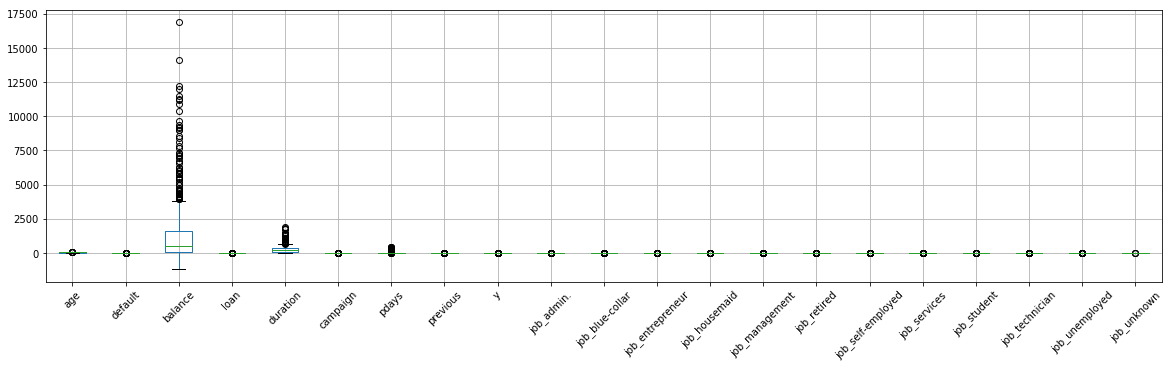

In [132]:
dataframe.boxplot(rot=45, figsize=(20,5))

In [133]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe,dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [134]:
column = ['age','balance','duration','campaign','pdays','previous']
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

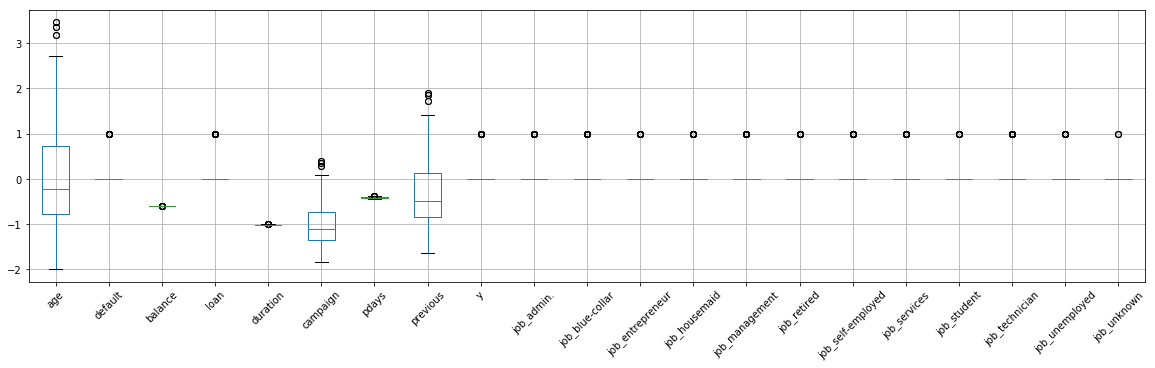

In [135]:
dataframe.boxplot(rot=45, figsize=(20,5))

In [136]:
def split(dataframe):
    test_data = dataframe.tail(100).reset_index(drop=True)
    return dataframe.head(len(dataframe)-100).reset_index(), test_data.reset_index()

In [137]:
# train data in dataframe and test data in test_data
dataframe, test_data = split(dataframe)

In [138]:
class Logistic_Regression_Algo:
    
    def __init__(self):
        self.iteration=10000
        self.learning_rate = 0.001
        self.boundary = 0.5
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3) = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

    def calculate_Z(self,weights,dataframe):
        return np.matmul(dataframe,weights.T)
        
    def calculate_G_of_Z(self,Z):
        gz= np.divide(1, 1+np.power(np.e,np.multiply(-1,Z)))
        return gz
    
    def loss(self,y,h_x):
        y_log_hx = np.multiply(y,np.log(h_x))
        _1_y_log_hx = np.multiply(np.subtract(1,y),np.log(np.subtract(1,h_x)))
        loss = np.divide(np.sum(np.add(y_log_hx,_1_y_log_hx)),-1*h_x.shape[0])
        return loss
    
    def Logistic_Regression_Algo_demo(self,dataframe):
        # weights of size n +1 as we'll add the bais at first
        weights = pd.Series(np.full(dataframe.shape[1],1.0)) # not multiplying by n+1 1 as we'll be deleting the y column
        dataframe.insert(loc=0, column='dummy', value=pd.Series(np.ones(dataframe.shape[0])))
        train_y = dataframe.y
        dataframe = dataframe.drop('y',axis=1)
        # Its the bais
        weights [0] = 1
        for epochs in range(0,self.iteration):
            z = self.calculate_Z(dataframe,weights)
            h_x = self.calculate_G_of_Z(z)
            cost = self.loss(train_y,h_x)
            diff = np.subtract(h_x,train_y)
            # check for the matmul  it gives 1d array or not
            dw = np.divide(np.matmul(dataframe.T,diff),dataframe.shape[0])
            weights  = np.subtract(weights,np.multiply(dw,self.learning_rate))
            if epochs % 10 == 0:
                self.ax1.plot(epochs,cost)
                self.ax1.set_title("Iteration vs Cost")
                self.ax2.plot(weights[1],weights[0])
                self.ax2.set_title("bais bs weight1")
                self.ax3.plot(dataframe.balance[5],weights[2])
                self.ax3.set_title('1 point of balance vs its weight')
                
        return weights
    
    def testing(self,test_data,weights):
        test_data.insert(loc=0, column='dummy', value=pd.Series(np.ones(test_data.shape[0])))
        test_y = np.array(dataframe.y)
        test_data = test_data.drop('y',axis=1)
        z = self.calculate_Z(weights,test_data)
        h_x = self.calculate_G_of_Z(z)
        Ypred =np.empty(test_data.shape[0])
        count = 0
        for counter in range(0,test_data.shape[0]):
            if h_x[counter]>self.boundary :
                Ypred[counter]=1
            else:
                Ypred[counter]=0
            if Ypred[counter]==test_y[counter]:
                count+=1
        accuracy  = count/test_data.shape[0]
        print("Accuracy",accuracy*100)
        
    def main(self,dataframe,test_data):
#         try:
        weights = self.Logistic_Regression_Algo_demo(dataframe)
        self.testing(test_data,weights)
#         except Exception as e:
#             print("The process was stopped because of ",e)

/home/admin1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/admin1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


Accuracy 82.0


<Figure size 432x288 with 0 Axes>

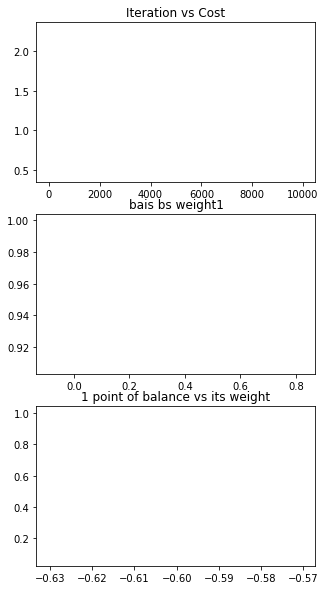

In [139]:
logistic = Logistic_Regression_Algo()
logistic.main(dataframe,test_data)
